# 11과 [실습] 숫자 vs 범주

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 보스톤 시, 타운별 집값  
③ 아이리스 꽃 분류  
④ 뉴욕 공기 오염도


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://bit.ly/3HaMAtZ')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Family,Age_scale1
0,0,3,male,22.0,1,0,7.2500,S,Age21_30,2,0.271174
1,1,1,female,38.0,1,0,71.2833,C,Age31_40,2,0.472229
2,1,3,female,26.0,0,0,7.9250,S,Age21_30,1,0.321438
3,1,1,female,35.0,1,0,53.1000,S,Age31_40,2,0.434531
4,0,3,male,35.0,0,0,8.0500,S,Age31_40,1,0.434531


In [3]:
# 아이리스 꽃 분류 : vesicolor? 1, 0

iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
iris = iris.loc[iris['Species'] != 'setosa']
iris['versicolor'] = np.where(iris.Species == 'versicolor', 1, 0)
iris.drop(['Species','Sepal.Length','Petal.Length'], axis = 1, inplace = True)
iris.head()

,Sepal.Width,Petal.Width,versicolor
50,3.2,1.4,1
51,3.2,1.5,1
52,3.1,1.5,1
53,2.3,1.3,1
54,2.8,1.5,1


## 2.시각화

① titanic : Age -- > Survived

* 히스토그램으로 관계를 살펴 봅시다.

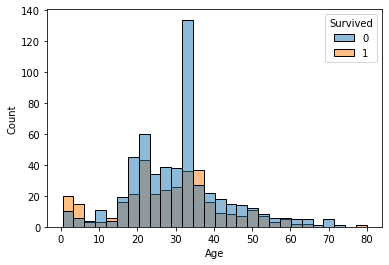

In [4]:
sns.histplot(data=titanic, x='Age', hue='Survived')
plt.show()

* density plot으로 비교해봅시다.  

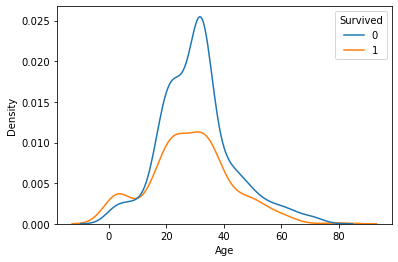

In [5]:
sns.kdeplot(data=titanic, x='Age', hue='Survived')
plt.show()

* 차트를 해석해 봅시다.

> - 대체로 20-40대의 승객이 많았으므로 해당하는 생존자, 사망자의 수는 따라 많다.
> - 그러나 10대 이하의 어린 아이들에 대해서는 생존자의 수가 사망자의 수보다 많다는 점이 인상적이다.

② iris : Petal.Width -- > versicolor

* 히스토그램으로 관계를 살펴 봅시다.

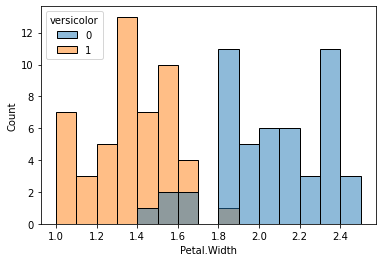

In [10]:
sns.histplot(data=iris, x='Petal.Width', hue='versicolor', bins=15)
plt.show()

* density plot으로 비교해봅시다.

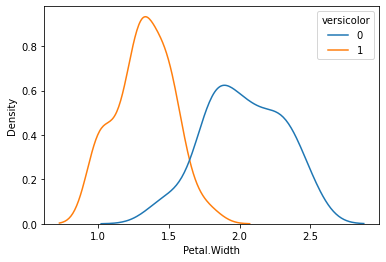

In [11]:
sns.kdeplot(data=iris, x='Petal.Width', hue='versicolor')
plt.show()

* 차트를 해석해 봅시다.

> - 넓이의 크기에 따라 해당하는 색이 명확하게 구분된다.

③ iris : Sepal.Length -- > versicolor

* 히스토그램으로 관계를 살펴 봅시다.

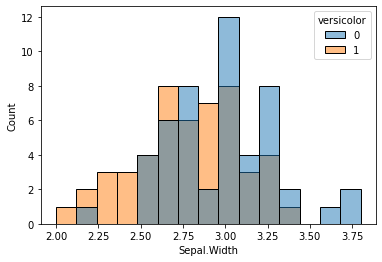

In [14]:
sns.histplot(data=iris, x='Sepal.Width', hue='versicolor', bins=15)
plt.show()

* density plot으로 비교해봅시다.

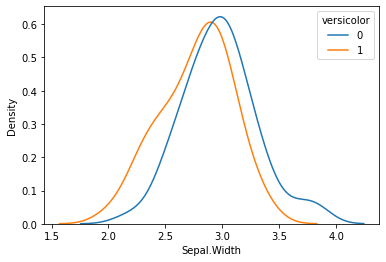

In [17]:
sns.kdeplot(data=iris, x='Sepal.Width', hue='versicolor')
plt.show()

* 차트를 해석해 봅시다.

> - Sepal.Width의 크기에 따라서 해당하는 모델을 구분하기는 어렵다.

## 3.수치화 : 로지스틱 회귀 모델로 부터 p value 구하기

숫자 --> 범주에 대해 딱 맞는 가설검정 도구가 없으므로, 로지스틱 회귀 모델로 부터 p-value를 구해봅시다.

① titanic : Age -- > Survived

* 로지스틱 회귀 모형으로 부터 pvalue를 구해 봅시다.

In [18]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(titanic['Survived'], titanic['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.661967
         Iterations 4
Age    3.932980e-13
dtype: float64


* 결과를 해석해 봅시다.

> - p_value가 e-13인것으로 보아 나이와 생존율은 상관관계가 있다.

② iris : Petal.Length -- > versicolor

* 로지스틱 회귀 모형으로 부터 pvalue를 구해 봅시다.

In [22]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(iris['versicolor'], iris['Petal.Width'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.672469
         Iterations 4
Petal.Width    0.044705
dtype: float64


* 결과를 해석해 봅시다.

> - p_value가 0.05이하이므로 꽃의 색과 넓이에 대해서 상관관계가 존재한다.

* 로지스틱 회귀 모형으로 부터 pvalue를 구해 봅시다.

In [23]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(iris['versicolor'], iris['Sepal.Width'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692525
         Iterations 3
Sepal.Width    0.724284
dtype: float64


* 결과를 해석해 봅시다.

> - p_value가 0.05이상이므로 상관관계가 존재하지 않는다.